In [ ]:
# Question: Detecting Data Drift
# Description: Identify potential data drift between two time periods for a numeric attribute.


Data Drift Analysis for feature 'Example Feature':

Summary Statistics:
Old Data - Mean: 50.114, Median: 50.216, Std Dev: 5.048
New Data - Mean: 52.918, Median: 52.930, Std Dev: 5.378

Kolmogorov-Smirnov Test:
KS Statistic: 0.228
P-value: 0.00000
Result: Data drift detected (distributions differ significantly).


/tmp/ipykernel_30842/1534280033.py:57: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(old_data, label='Old Data', shade=True)
/tmp/ipykernel_30842/1534280033.py:58: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_data, label='New Data', shade=True)


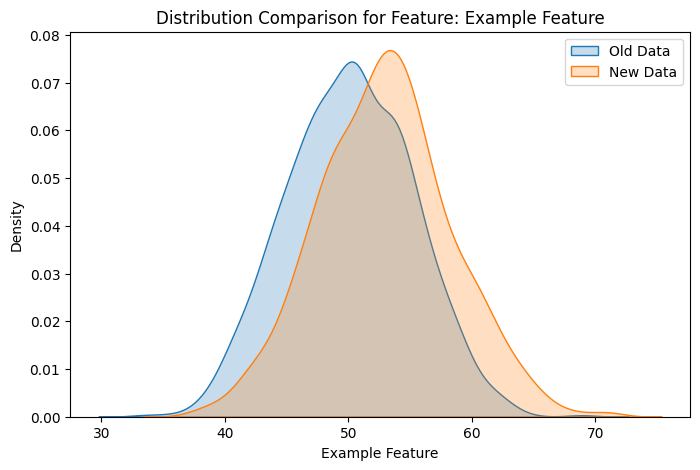

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns

def detect_data_drift(old_data, new_data, feature, alpha=0.05):
    """
    Detect data drift between two time periods for a numeric feature using:
    - Summary statistics comparison
    - Kolmogorov-Smirnov (KS) test
    
    Args:
        old_data (pd.Series or np.array): Historical data for the feature.
        new_data (pd.Series or np.array): Recent data for the feature.
        feature (str): Feature name (for reporting).
        alpha (float): Significance level for KS test (default 0.05).
        
    Returns:
        dict: Summary statistics and KS test result indicating data drift.
    """
    # Calculate summary statistics
    stats_old = {
        'mean': np.mean(old_data),
        'median': np.median(old_data),
        'std_dev': np.std(old_data),
        'min': np.min(old_data),
        'max': np.max(old_data)
    }
    stats_new = {
        'mean': np.mean(new_data),
        'median': np.median(new_data),
        'std_dev': np.std(new_data),
        'min': np.min(new_data),
        'max': np.max(new_data)
    }
    
    # Perform Kolmogorov-Smirnov test
    ks_stat, p_value = ks_2samp(old_data, new_data)
    drift_detected = p_value < alpha
    
    # Print summary
    print(f"Data Drift Analysis for feature '{feature}':\n")
    print("Summary Statistics:")
    print(f"Old Data - Mean: {stats_old['mean']:.3f}, Median: {stats_old['median']:.3f}, Std Dev: {stats_old['std_dev']:.3f}")
    print(f"New Data - Mean: {stats_new['mean']:.3f}, Median: {stats_new['median']:.3f}, Std Dev: {stats_new['std_dev']:.3f}")
    print(f"\nKolmogorov-Smirnov Test:")
    print(f"KS Statistic: {ks_stat:.3f}")
    print(f"P-value: {p_value:.5f}")
    if drift_detected:
        print("Result: Data drift detected (distributions differ significantly).")
    else:
        print("Result: No significant data drift detected.")
    
    # Visualize distributions
    plt.figure(figsize=(8,5))
    sns.kdeplot(old_data, label='Old Data', shade=True)
    sns.kdeplot(new_data, label='New Data', shade=True)
    plt.title(f'Distribution Comparison for Feature: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    
    return {
        'old_stats': stats_old,
        'new_stats': stats_new,
        'ks_statistic': ks_stat,
        'p_value': p_value,
        'drift_detected': drift_detected
    }


# Example usage with synthetic data:

# Historical data (old period)
old = np.random.normal(loc=50, scale=5, size=1000)

# Recent data (new period) with a slight shift in mean to simulate drift
new = np.random.normal(loc=53, scale=5, size=1000)

result = detect_data_drift(old, new, feature='Example Feature')
